***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 2**

***Problem 2.11***


***Estimate the global irradiance G(α,β) reaching the plane of array (POA) of a north-facing, 20° tilted generator over grass located at a PV plant in Antananarivo, Madagascar (18° 56′ 0″ S, 47° 31′ 0″ E) at midday (true solar time) on May 12, 2022.***

***Solve the problem using pvlib-python and the default clear-sky model***

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [9]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

We start by defining the location, date and time. 
We will implement the calculation 

In [10]:
# Antananarivo, Madagascar
lat, lon = 18.93, 47.52
tz = 'Africa/Mbabane'

date = '2022-05-12'

# surface angles beta, alpha
tilt, orientation = 20, 0 # pvlib sets orientation origin at North -> North=180

# location
location = pvlib.location.Location(lat, lon, tz=tz)

# albedo
albedo = 0.20

# datetimes
times = pd.date_range(start=date, freq='1H', periods=24, tz=tz)

We calculate the clear-sky irradiance using the default options in pvlib. 

In [11]:
# generates clear-sky ghi, dni, dhi irradiances (decomposition using Ineichen model and turbidity index; pvlib's default)
clearsky = location.get_clearsky(times, model='ineichen')

We calculate the Sun's coordinates and calculate the irradiance on the plane of array (POA)

In [12]:
# calculates Sun's coordinates
solar_position = location.get_solarposition(times=times)

# calculates POA (transposition using isotropic model)
poa_fixed_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=tilt,
    surface_azimuth=orientation,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    albedo=albedo,
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'],
    model='isotropic')

We can plot the daily evolution of direct, diffuse, and global irradiance

Text(0, 0.5, 'Radiation (W/m2)')

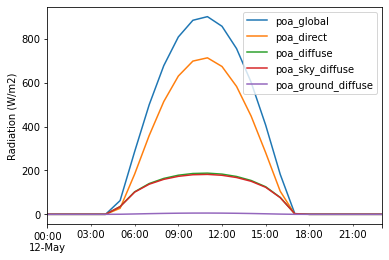

In [13]:
poa_fixed_irradiance.plot()
plt.ylabel('Radiation (W/m2)')

And obatain the value at midday. 

In [17]:
poa_fixed_irradiance.loc['2022-05-12 12:00:00+02:00']

poa_global            858.215396
poa_direct            674.701625
poa_diffuse           183.513772
poa_sky_diffuse       178.080865
poa_ground_diffuse      5.432906
Name: 2022-05-12 12:00:00+02:00, dtype: float64

We can also obtain the values at any other time step

In [18]:
poa_fixed_irradiance

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2022-05-12 00:00:00+02:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 01:00:00+02:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 02:00:00+02:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 03:00:00+02:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 04:00:00+02:00,0.000000,0.000000,0.000000,0.000000,0.000000
2022-05-12 05:00:00+02:00,62.700116,27.491646,35.208470,34.884099,0.324371
2022-05-12 06:00:00+02:00,286.589251,183.744253,102.844997,101.220979,1.624019
2022-05-12 07:00:00+02:00,500.574431,360.062535,140.511896,137.509177,3.002719
2022-05-12 08:00:00+02:00,678.528120,514.695691,163.832429,159.632945,4.199484
2022-05-12 09:00:00+02:00,809.532612,631.064616,178.467996,173.370556,5.097440
